In [1]:
from hdf5storage import loadmat, savemat 
import numpy as np 
import networkx as nx
from matplotlib import pyplot as plt 

In [3]:
demographics=loadmat('demographics.mat')

In [4]:
demographics.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FM_scores', 'ages', 'cor_ind', 'days_poststroke', 'lesion_sizes', 'matfile_names', 'subc_ind'])

In [5]:
matfile_names=demographics['matfile_names']
FM_scores=demographics['FM_scores']
ages=demographics['ages']
days_poststroke=demographics['days_poststroke']
lesion_sizes=demographics['lesion_sizes']
cor_ind=demographics['cor_ind']
subc_ind=demographics['subc_ind']


In [6]:
import os
import numpy as np
import time


In [8]:
# Set the directory path
directory_path = '/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh'

In [9]:
os.chdir(directory_path)

In [155]:
pwd

'/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh'

In [13]:
file_name

'0.mat'

In [15]:
tic = time.time()
# Load data from the .mat file
file_name = str(matfile_names[0][0]) + '.mat'
data = loadmat(file_name)
# Extract data from the loaded file
stroke_coh = data['stroke_coh']
stroke_Pcoh = data['stroke_Pcoh']
penalizationIn_op=data['penalizationIn_op']
penalizationOut_op=data['penalizationOut_op']
minDev_op=data['minDev_op']
subject_ID = data['subject_ID']
chanlocs = data['chanlocs']
ch_labels = data['ch_labels']
ch_dubious = data['ch_dubious']
ch_peripheral = data['ch_peripheral']
Fs = data['Fs']
toc = time.time()
print(f"Time elapsed for file {file_name}: {toc - tic:.4f} seconds")

Time elapsed for file 0.mat: 0.0732 seconds


In [ ]:
np.shape(stroke_Pcoh[0][4])

In [18]:
G= nx.from_numpy_array(stroke_Pcoh[0][4])

In [20]:
edges=nx.edges(G)
nodes=nx.nodes(G)

In [23]:
dg_hist=nx.degree_histogram(G)

In [37]:
data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')

In [39]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stroke_Pcoh'])

In [46]:
file_name

'0.mat'

In [ ]:
# didn't work
dg_hist_5 = [[] for _ in range(5)]
dg_hist_61 = [dg_hist_5 for _ in range(61)]
for f in range(61):
    data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+str(matfile_names[f][0]) + '.mat', variable_names='stroke_Pcoh')
    for freq in range(5):
        G= nx.from_numpy_array(data['stroke_Pcoh'][0][freq])
        dg_hist=nx.degree_histogram(G)
        dg_hist_61[f][freq]=dg_hist.copy()

# Failed: some how every all 61 data set in each freq look the same

# 28 s

In [98]:
len(dg_hist_61[5])

5

In [140]:
dg_hist_61[22][4]

[0,
 0,
 175,
 15,
 15,
 6,
 4,
 8,
 4,
 5,
 8,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 5,
 3,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 0,
 0,
 3,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 4,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [145]:
# This works
dg_hist_61 = np.empty((61, 5), dtype=object)
for f in range(61):
    file_name = str(matfile_names[f][0]) + '.mat'
    data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')
    stroke_Pcoh = data['stroke_Pcoh']
    for freq in range(5):
        G= nx.from_numpy_array(stroke_Pcoh[0][freq])
        dg_hist=nx.degree_histogram(G)
        dg_hist_61[f,freq]=dg_hist.copy()

In [193]:
f=33
file_name = str(matfile_names[f][0]) + '.mat'
data = loadmat('/home/zhibinz2/Documents/GitHub/archive/EEE_stroke_61_coh/'+file_name, variable_names='stroke_Pcoh')
stroke_Pcoh = data['stroke_Pcoh']
freq=0
G= nx.from_numpy_array(stroke_Pcoh[0][freq])
dg_hist=nx.degree_histogram(G)

In [200]:
len(nx.edges(G))

100576

In [170]:
np.shape(stroke_Pcoh[0][freq])

(448, 448)

In [146]:
type(dg_hist_61[59,1])

list

In [ ]:
dg_hist_61[59,1]

In [159]:
os.chdir('/home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/organize_62stroke')

In [162]:
import pickle

In [163]:
# Save dg_hist_61 as a pickle file
with open('dg_hist_61.pkl', 'wb') as file:
    pickle.dump(dg_hist_61, file)

In [164]:
# Load the saved data back into a variable
with open('dg_hist_61.pkl', 'rb') as file:
    loaded_dg_hist_61 = pickle.load(file)

In [ ]:
loaded_dg_hist_61[60,4]

In [181]:
np.shape(np.array(dg_hist_61[60,4]))

(247,)

In [184]:
np.argmax(dg_hist_61[60,4], axis=0)

2

In [183]:
np.argmax(np.array(dg_hist_61[60,4]), axis=0)

2

In [192]:
ans=dg_hist_61[33,0]

In [168]:
np.sum(dg_hist_61[60,4])

448

In [201]:
# identify the highest dreegree frequency 
max_dg_freq=np.zeros((61,5))
for f in range(61):
    for freq in range(5):
        max_dg_freq[f,freq]=max(dg_hist_61[f,freq])*np.argmax(dg_hist_61[f,freq], axis=0)
        # max_dg_freq[f,freq]=np.argmax(dg_hist_61[f,freq], axis=0)


In [202]:
max_dg_freq

array([[1.72000e+02, 2.20000e+02, 2.40000e+02, 2.72000e+02, 2.74000e+02],
       [1.12000e+02, 1.54000e+02, 1.20000e+02, 1.38000e+02, 1.58000e+02],
       [4.10000e+02, 5.80000e+02, 5.94000e+02, 4.14000e+02, 4.08000e+02],
       [6.30000e+02, 3.52000e+02, 3.62000e+02, 3.44000e+02, 3.98000e+02],
       [1.40000e+02, 1.44000e+02, 1.44000e+02, 1.44000e+02, 1.44000e+02],
       [5.00000e+02, 3.32000e+02, 3.14000e+02, 3.16000e+02, 3.48000e+02],
       [2.32000e+02, 2.86000e+02, 3.08000e+02, 3.14000e+02, 3.52000e+02],
       [2.58000e+02, 2.78000e+02, 2.72000e+02, 2.90000e+02, 3.54000e+02],
       [3.48000e+02, 3.64000e+02, 3.56000e+02, 3.82000e+02, 3.82000e+02],
       [2.90000e+02, 2.68000e+02, 2.70000e+02, 2.70000e+02, 3.16000e+02],
       [2.48000e+02, 2.36000e+02, 2.40000e+02, 2.28000e+02, 2.30000e+02],
       [7.64000e+02, 3.80000e+02, 3.78000e+02, 3.78000e+02, 2.01152e+05],
       [2.76000e+02, 2.84000e+02, 2.66000e+02, 2.12000e+02, 2.02000e+02],
       [3.84000e+02, 3.78000e+02, 3.76

In [ ]:
max_dg_freq

(100.0, 2000.0)

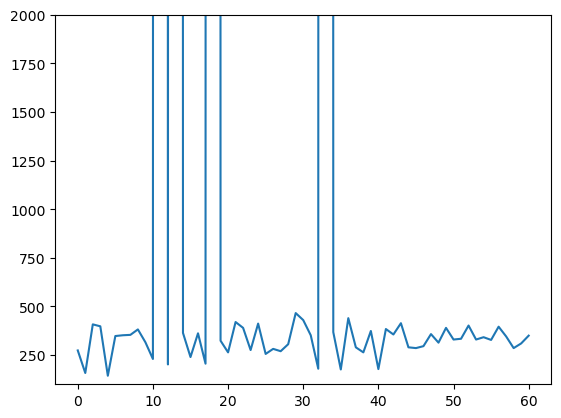

In [216]:
plt.plot(range(61),max_dg_freq[:,4])
plt.ylim([100,2000])

(0.0, 500.0)

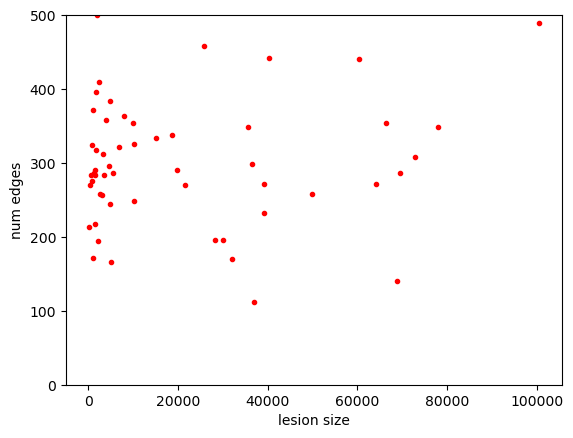

In [231]:
plt.plot(lesion_sizes,max_dg_freq[:,0],'r.')
plt.xlabel('lesion size')
plt.ylabel('num edges')
plt.ylim([0,500])

In [ ]:
plt.subplot(1,2,1)
plt.plot()

In [245]:
cor_test=cor_ind.tolist()

In [273]:
bool_cor=np.squeeze(cor_ind ==1)
bool_subc=np.squeeze(subc_ind==1)

In [280]:
sum(cor_ind)

array([27], dtype=uint8)

In [281]:
cor_ed=np.zeros((int(sum(cor_ind)),5))
subc_ed=np.zeros((int(sum(subc_ind)),5))
for freq in range(5):
    cor_ed[:,freq]=max_dg_freq[:,freq][bool_cor]
    subc_ed[:,freq]=max_dg_freq[:,freq][bool_subc]


In [295]:
freq=0
AA=np.concatenate((cor_ed[:,freq],subc_ed[:,freq]),axis=0)

In [296]:
np.shape(AA)

(61,)

In [275]:
A[bool_cor]

array([1.58000e+02, 1.44000e+02, 3.52000e+02, 3.82000e+02, 2.30000e+02,
       4.20000e+02, 3.90000e+02, 2.82000e+02, 4.30000e+02, 2.01152e+05,
       3.68000e+02, 4.40000e+02, 2.90000e+02, 3.84000e+02, 4.14000e+02,
       2.86000e+02, 2.96000e+02, 3.58000e+02, 3.14000e+02, 3.90000e+02,
       3.30000e+02, 3.34000e+02, 4.02000e+02, 3.42000e+02, 3.46000e+02,
       3.10000e+02, 3.50000e+02])

(0.0, 1000.0)

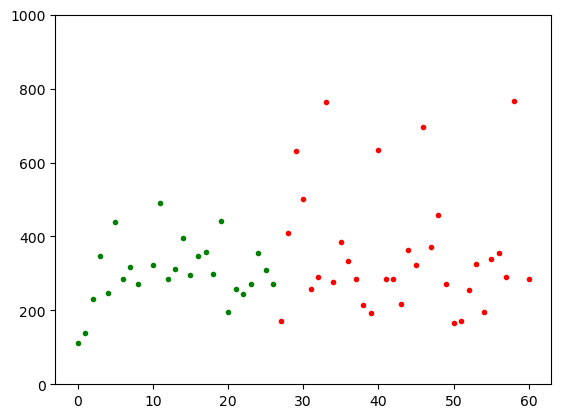

In [301]:
# cortical vs subc
freq=0
plt.plot(range(27),cor_ed[:,freq],'g.')
plt.plot(range(27,61),subc_ed[:,freq],"r.")
plt.ylim([0,1000])

